# Tiger Image Compression using K-means

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.io import imread, imshow
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
sns.set()

### Reading the tiger image

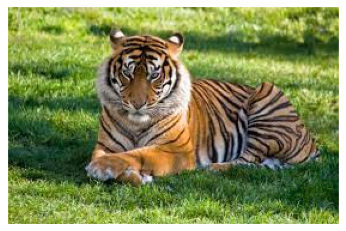

In [2]:
tiger = imread('D:/tiger_image.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(tiger)

In [3]:
print(tiger.shape)

(182, 278, 3)


In [4]:
tiger

array([[[119, 141,  58],
        [146, 168,  86],
        [212, 228, 155],
        ...,
        [170, 187,  73],
        [190, 207,  93],
        [182, 199,  85]],

       [[135, 157,  72],
        [137, 159,  76],
        [193, 209, 134],
        ...,
        [161, 180,  62],
        [181, 198,  83],
        [173, 192,  74]],

       [[134, 157,  66],
        [125, 148,  58],
        [174, 192, 110],
        ...,
        [140, 162,  36],
        [156, 176,  53],
        [150, 172,  46]],

       ...,

       [[153, 173,  62],
        [133, 152,  44],
        [145, 164,  57],
        ...,
        [165, 197,  90],
        [138, 170,  63],
        [134, 166,  59]],

       [[178, 198,  87],
        [131, 150,  42],
        [147, 166,  59],
        ...,
        [191, 223, 116],
        [168, 200,  93],
        [130, 162,  55]],

       [[171, 191,  80],
        [134, 153,  45],
        [128, 147,  40],
        ...,
        [107, 139,  32],
        [174, 206,  99],
        [137, 169,  62]]

### Reshaping the image

In [5]:
data = tiger/255.0
data = data.reshape(182*278,3)
data.shape

(50596, 3)

In [6]:
data

array([[0.46666667, 0.55294118, 0.22745098],
       [0.57254902, 0.65882353, 0.3372549 ],
       [0.83137255, 0.89411765, 0.60784314],
       ...,
       [0.41960784, 0.54509804, 0.1254902 ],
       [0.68235294, 0.80784314, 0.38823529],
       [0.5372549 , 0.6627451 , 0.24313725]])

In [7]:
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20)

### Plotting the colors of the original image

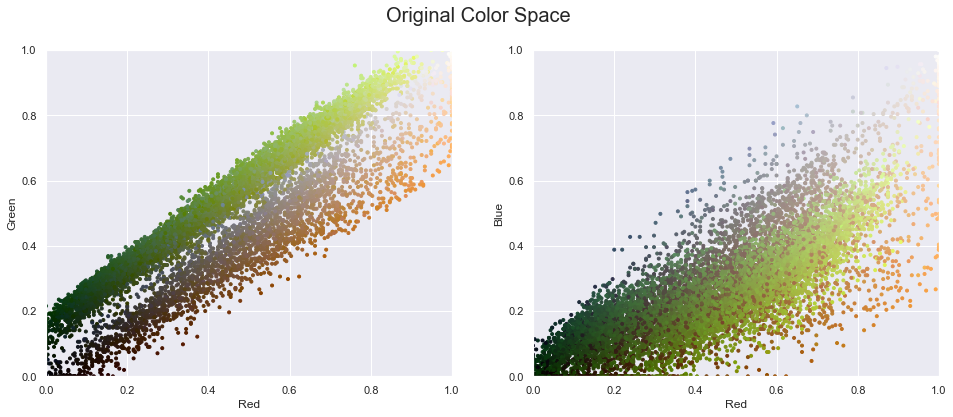

In [8]:
plot_pixels(data,title='Original Color Space')

In [9]:
import warnings
warnings.simplefilter('ignore')

### Plotting the reduced color 

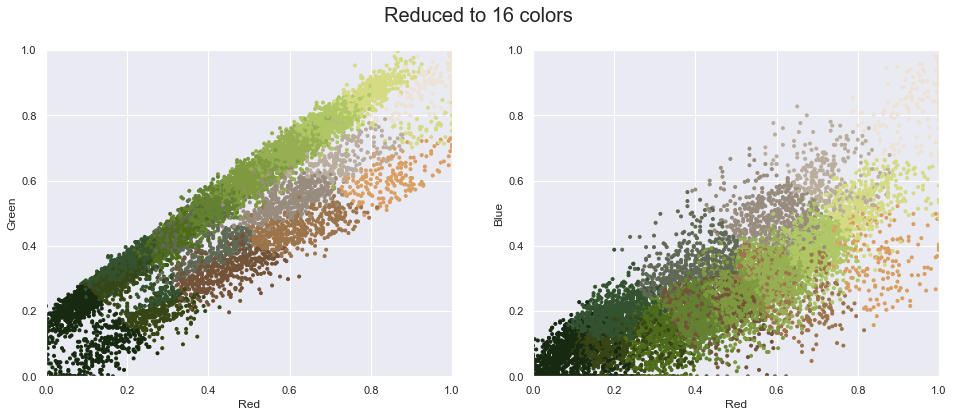

In [10]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title='Reduced to 16 colors')

### Compairing the original and the compressed image

Text(0.5, 1.0, 'Compressed Image')

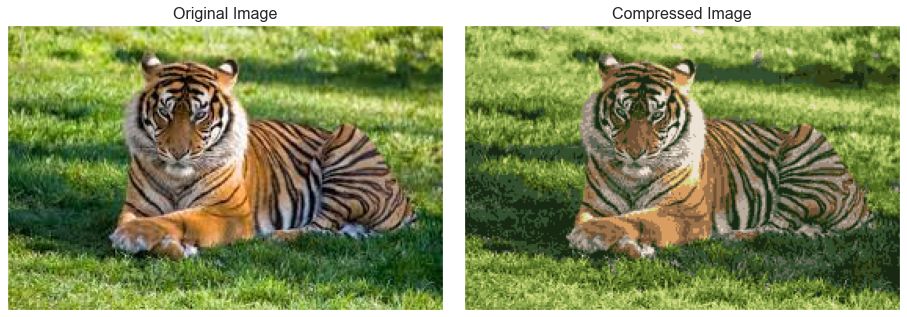

In [11]:
tiger_recoloured = new_colors.reshape(tiger.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(tiger)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(tiger_recoloured)
ax[1].set_title('Compressed Image',size=16)